# Chapter 1 Introduction

## What kind of problems? Why first principle is difficult?

- when the application rules may change a lot according to new situations.
- when the input data and related computation are too complex to tackle with rules.


## key component of machine learning

- input data
- model(parameters)
- objective function
- optimization algorithm


## supervised learning

sample + labels

### regression
answer the question **how many?**

typical loss function: mean square loss (assuming data were corrupted by Gaussian Noise)
### classification

anser the question **which one?**

setup output in a probability approach which is easier for optimization

typical loss function: cross entropy loss

binary, multiclass, multi-label(not mutually exclusive), hierarchical classification

- tagging
- search(Pangerank)
- recommender system: problems as deal with censoring, incentives, and feedback loops
- sequence learning: Tagging and Parsing; Automatic Speech Recognition; Text to speech; Machine Translation;


## unsuperised learning

- Can we find a small number of prototypes that accurately summarize the data? Clustering.
- Can we find a small number of parameters that accurately capture the relevant properites of the data? Subspace extimation/ Principal component anaylsis
- Is there a representation of objects in Euclidean space such that symbolic properties can be well matched?
- Is there a description of the root causes of much of the data that we observe? Causality/ Probabilistic graphical models
- Generative adversial networks.

## Reinforcement learning

- we can formulate any superivsed learning problems into RL.
- RL can address many problems that supervised learning cannot. For example RL do not assume that for each observation the environment tells us the optimal action.

- need deal with the problem of credit assignment; partial observability problem; exploit vs explore

- comlexity issue is huge.

- Markov decision process: when env is fully observed
- Contextual bandit problem: state does not depend on the previous actions
- multi-armed bandit problem: no state, just a set of available actions with initially unkown rewoards.


## Example of Important progresses:

- Novel methodes for capacity control: e.g. Dropout
- Attention mechanisms
- Multi-stage designs
- GAN
- Paralelize computation
- Deep Learning Frameworks

# Chapter2 Preliminaries

In [1]:
import torch

In [2]:
x =torch.arange(12, dtype=torch.float32)

In [3]:
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
x.shape

torch.Size([12])

In [6]:
x.numel()

12

In [7]:
X=x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [8]:
x.reshape(-1,4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [9]:
x.reshape(3,-1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [10]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [13]:
torch.randn(3,4)

tensor([[-0.5603, -1.2947,  1.1689, -1.4815],
        [ 0.9108, -0.0809, -0.3887, -0.8095],
        [-1.0935,  0.1845,  0.1581,  0.8024]])

In [14]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [15]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])

x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [17]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y), axis=0), torch.cat((X,Y), axis=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

broadcasting
operation between tensors with different shapes
1. expand one or both tensors by copying elements approprately, so that after this transformation, the two tensors have the same shape.
2. carry out elementwise operations on the resulting tensors.

In [20]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [21]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [22]:
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [23]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [24]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [26]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

Saving Memory

Performing in-place operations

In [28]:
Z = torch.zeros_like(Y)
print("id(Z):",id(Z))
Z[:]=X+Y
print()
print("id(Z):",id(Z))

id(Z): 2513385768664

id(Z): 2513385768664


In [29]:
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [30]:
Y

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [31]:
X<Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [32]:
X>Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [36]:
c=torch.arange(8).reshape((2,2,2))

In [37]:
c

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

In [41]:
d=torch.arange(4).reshape((2,2,1))

In [42]:
d

tensor([[[0],
         [1]],

        [[2],
         [3]]])

In [43]:
c+d

tensor([[[ 0,  1],
         [ 3,  4]],

        [[ 6,  7],
         [ 9, 10]]])

In [ ]:
# implement linear regression

In [1]:
# matplotlib inline
import torch
import random


In [9]:
def synthetic_data(w, b, num_example):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0,1, (num_example, len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01, y.shape)

    print(y.size())

    return X, y.reshape(-1,1)

In [10]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

torch.Size([1000])


In [11]:
features.size()

torch.Size([1000, 2])

In [12]:
labels.size()

torch.Size([1000, 1])

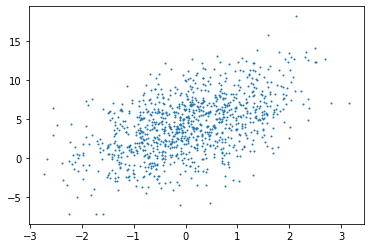

In [17]:
import matplotlib.pyplot as plt

plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(), 1)

In [18]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机打乱顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [19]:
batch_size=10

for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break

tensor([[-2.1387, -0.4461],
        [ 0.4058,  0.3074],
        [ 0.6962,  0.6661],
        [-0.6844, -1.4010],
        [ 0.0562,  0.6266],
        [-0.0575,  1.3802],
        [ 1.4647,  1.2880],
        [-0.7147,  0.0403],
        [-0.5889,  0.7768],
        [ 0.5513, -0.4268]]) 
 tensor([[ 1.4462],
        [ 3.9580],
        [ 3.3230],
        [ 7.5819],
        [ 2.1788],
        [-0.6118],
        [ 2.7370],
        [ 2.6359],
        [ 0.3693],
        [ 6.7681]])


In [45]:
#initializing Model Parameters

w = torch.normal(0,0.01, size=(2,1), requires_grad= True)
b = torch.zeros(1, requires_grad= True)

In [46]:
def linreg(X, w, b):
    "The linear regression model"
    return torch.matmul(X, w)+b

In [47]:
def square_loss(y_hat, y):
    "square loss"
    return (y_hat - y.reshape(y_hat.size()))**2/2

In [48]:
# 定义sgd
def sgd(params, lr, batch_size):
    with torch.no_grad(): # 注 这里如果去掉，params在下边遍历时会自动更新grad，此时则是遍历时写入，对于遍历写入隔离的设置会报错
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_() 


In [51]:
# 定义更新参数
lr = 0.01
num_epochs= 10
net = linreg
loss = square_loss

In [52]:
for epoch in range(num_epochs):
    for X, y  in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y) # 计算minibatch的loss
        #借助autograd来计算对于w，b的grad
        l.sum().backward()
        #带入sgd
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051
epoch 6, loss 0.000051
epoch 7, loss 0.000051
epoch 8, loss 0.000051
epoch 9, loss 0.000051
epoch 10, loss 0.000051


In [53]:
print(f'error in estimating w: {true_w-w.reshape(true_w.size())}')
print(f'error in estimating b: {true_b-b}')

error in estimating w: tensor([-0.0012,  0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([-4.0054e-05], grad_fn=<RsubBackward1>)


# Multlayer Perceptions

## Xavier init

## He init

## L2 norm and Dropout and Batch norm

- L2 norm and Dropout relationship.


- why Batch norm is more useful in Resnet?

## Ways to prevent overfitting

- L1+L2
- Dropout
- BN
- get more training data
- Data Augmentatioin


### Dropout

set other undropped nodes with weight 1/(1-p_dropout), or predict with node*dropout

## distribution shift